# **Projet Python 2A**

**Partie 1 : Récupération des données et premières manipulations**

On commence par importer notre base de données principale, celle contenant les différents équipements sportifs en France.
Nous en obtenons un rapide aperçu ci-dessous.
Nous appelerons cette base de données *equipements*.

In [1]:
import pandas as pd

equipements = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/equipments.csv", sep=';', encoding='latin-1', low_memory=False)
equipements.head()

,DepCode,DepLib,ComInsee,ComLib,InsNumeroInstall,InsNom,EquipementId,EquNom,EquipementTypeCode,EquipementTypeLib,...,EquUtilClub,EquUtilAutre,EquUtilIndividuel,EquUtilPerformance,EquUtilFormation,EquUtilRecreation,EquDateDernierTravauxReal,EquDateDernierTravauxAucun,EquGPSX,EquGPSY
0,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E001I010010003,SALLE POLYVALENTE,2201,Salles polyvalentes / des fêtes / non spéciali...,...,1,1,1,0,0,1,NaN,1.0,"4,9206","46,1531"
1,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E002I010010003,BOULODROME COUVERT 8 JEUX,201,Terrain de boules,...,1,0,0,0,0,1,NaN,1.0,"4,9206","46,1531"
2,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E003I010010003,BOULODROME EXTERIEUR,201,Terrain de boules,...,1,0,1,0,0,1,NaN,1.0,"4,9206","46,1531"
3,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E001I010010004,Terrain de Foot de Proximité,2802,Terrain de football,...,0,0,1,0,0,1,NaN,1.0,"4,9247","46,1511"
4,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E002I010010004,AGORESPACE,1701,Plateau EPS/Multisports/city-stades,...,0,0,1,0,0,1,NaN,1.0,"4,9242","46,1508"


Commençons par réaliser quelques statistiques descriptives, afin de vérifier si la base de données est cohérente et exhaustive.

In [14]:
equipements.count()

DepCode                            318037
DepLib                             318037
ComInsee                           318037
ComLib                             318037
InsNumeroInstall                   318037
InsNom                             315472
EquipementId                       318037
EquNom                             318037
EquipementTypeCode                 318037
EquipementTypeLib                  318037
EquipementFamille                  318037
EquipementCateg                    318037
GestionTypeProprietairePrincLib    314826
GestionTypeGestionnairePrincLib    313934
GestionTypeProprietaireSecLib       53021
GestionTypeGestionnaireSecLib       26242
EquAnneeService                    202275
NatureSolLib                       313302
NatureLibelle                      314948
EquUtilScolaire                    318037
EquUtilClub                        318037
EquUtilAutre                       318037
EquUtilIndividuel                  318037
EquUtilPerformance                

In [15]:
equipements.nunique()

DepCode                               107
DepLib                                107
ComInsee                            28458
ComLib                              26784
InsNumeroInstall                   139953
InsNom                              78767
EquipementId                       318037
EquNom                             114650
EquipementTypeCode                    163
EquipementTypeLib                     163
EquipementFamille                      30
EquipementCateg                         7
GestionTypeProprietairePrincLib        12
GestionTypeGestionnairePrincLib        12
GestionTypeProprietaireSecLib          12
GestionTypeGestionnaireSecLib          12
EquAnneeService                       203
NatureSolLib                           16
NatureLibelle                           7
EquUtilScolaire                         2
EquUtilClub                             2
EquUtilAutre                            2
EquUtilIndividuel                       2
EquUtilPerformance                

Désormais, nous allons modifier cette base de données afin de regrouper le nombre d'équipements sportifs par département. Pour cela, nous créons un nouveau DataFrame que nous appellerons *equipements_departements*. Nous enlevons aussi la plupart des colonnes qui ne nous servent, dans un premier temps, à rien.
Afin de faciliter nos futurs graphiques, nous nous intéressons ici seulement au départements de France métropolitaine.

In [3]:
equipements_departements = pd.DataFrame(equipements.groupby('DepCode')['EquipementId'].count()).head(96)
equipements_departements = equipements_departements.rename({"EquipementId":"NbreEquipements"}, axis=1)
equipements_departements.head()

,NbreEquipements
DepCode,
01,3781
02,3442
03,2514
04,1649
05,3075


Nous pouvons désormais nous intéresser davantage aux statistiques descriptives du DataFrame *equipements_departements*.

In [5]:
equipements_departements.describe()

,NbreEquipements
count,96.000000
mean,3223.666667
std,1553.506259
min,512.000000
25%,2036.000000
50%,2918.500000
75%,3939.500000
max,8534.000000


Ainsi, on peut voir que la répartition des équipements sportifs en France est relativement hétérogène, même si une  majorité des départements semblent se situer entre 2000 et 4000 équipements sportifs.
Néanmoins, cela paraît clairement logique, au vu des situations très différentes entre les départements, que ce soit au niveau de leur population ou de l'espace disponible.

Dès lors, nous décidons dans un premier temps d'ajouter une variable explicative à la répartition des équipements sportifs en France : la population par département.
Pour cela, nous importons une nouvelle base de données, disponible cette fois sur le site de l'INSEE.
Nous pouvons obtenir un aperçu de la base de donnée susmentionnée, que nous nommons *population*.

In [7]:
population = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/Population2019.CSV", sep=';', low_memory=False)
population.head()

,CODGEO,P19_POP,P13_POP,P08_POP,D99_POP,D90_POP,D82_POP,D75_POP,D68_POP,SUPERF,...,D75_LOGVAC,D68_LOGVAC,P19_PMEN,P13_PMEN,P08_PMEN,D99_PMEN,D90_NPER_RP,D82_NPER_RP,D75_NPER_RP,D68_NPER_RP
0,01001,779,767,791,728,579,477,368,347,15.95,...,22.0,25.0,779.000000,767.000000,791.000000,728,579,477.0,368.0,347.0
1,01002,256,236,194,168,159,136,106,88,9.15,...,23.0,1.0,256.000000,236.000000,194.000000,168,159,136.0,106.0,88.0
2,01004,14134,14359,12792,11436,10455,9737,9550,8949,24.60,...,246.0,155.0,13625.012669,13831.019385,12305.616156,11015,10092,9333.0,9164.0,8582.0
3,01005,1751,1635,1567,1408,1156,848,756,627,15.92,...,16.0,15.0,1751.000000,1635.000000,1567.000000,1406,1155,848.0,753.0,627.0
4,01006,112,108,123,86,76,65,82,108,5.88,...,13.0,8.0,112.000000,108.000000,123.000000,86,76,65.0,82.0,108.0


Là encore, nous décidons de retravailler notre base de données. Pour cela, nous nous séparons des colonnes inutiles pour ne garder que la population par ville en 2019, puis nous les regroupons par département.
Nous obtenons ainsi le DataFrame *population_departements* dont un aperçu est disponible juste en-dessous.

In [8]:
population['DepCode'] = population['CODGEO'].str[:2]

population_departements = pd.DataFrame(population.groupby('DepCode')['P19_POP'].sum()).head(96)
population_departements = population_departements.rename({"P19_POP":"Population"}, axis=1)
population_departements.head()                                                        


,Population
DepCode,
01,652432
02,531345
03,335975
04,164308
05,141220


Ici encore, nous pouvons réaliser quelques statistiques descriptives rapides.

In [9]:
population_departements.describe()

,Population
count,9.600000e+01
mean,7.151655e+05
std,6.603543e+05
min,7.660400e+04
25%,2.967150e+05
50%,5.390490e+05
75%,8.508368e+05
max,4.330846e+06


Comme c'était le cas pour les équipements sportifs, la répartition de la population est également très hétérogène entre les départements.

Nous souhaitons désormais nous intéresser au lien qui existe (peut-être) entre population et nombre d'équipements sportifs au sein des départements français.

Pour cela, nous commençons par concaténer nos DataFrames en un seul, que nous nommons *data_base*.

In [10]:
data_base = pd.concat([equipements_departements,population_departements], axis=1)
data_base.head()

,NbreEquipements,Population
DepCode,,
01,3781,652432
02,3442,531345
03,2514,335975
04,1649,164308
05,3075,141220


In [73]:
data_base["NbreHabitants/Equipement"] = data_base["Population"]/data_base["NbreEquipements"]
data_base.describe()
data_base.sort_values("NbreHabitants/Equipement")

,NbreEquipements,Population,NbreHabitants/Equipement
DepCode,,,
05,3075,141220,45.925203
48,1290,76604,59.382946
36,2426,219316,90.402308
15,1581,144692,91.519292
09,1580,153287,97.017089
...,...,...,...
92,3457,1624357,469.874747
94,2781,1407124,505.977706
13,5611,2913841,519.308679


In [74]:
# packages utiles
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


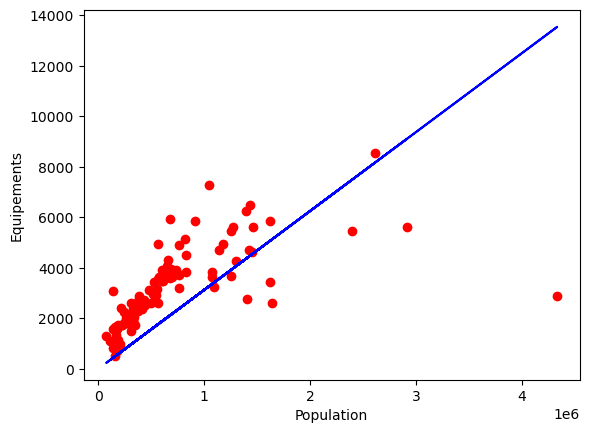

In [83]:
x = data_base[["Population"]]
y = data_base[["NbreEquipements"]]
model = LinearRegression(fit_intercept=False).fit(x,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.xlabel('Population')
plt.ylabel('Equipements')
plt.show()